In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin1')

In [7]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Month'] = df['Order Date'].dt.month.astype('str')

In [11]:
df[['Order Date','Ship Date','Month']].head(5)

,Order Date,Ship Date,Month
0,2016-11-08,2016-11-11,11
1,2016-11-08,2016-11-11,11
2,2016-06-12,2016-06-16,6
3,2015-10-11,2015-10-18,10
4,2015-10-11,2015-10-18,10


In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
print("data =",df)

data =       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Hen

**Exploratory Data Analysis**

---


*Executive Summary Metrics*
*of Total Sales and Profit*

In [19]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

In [15]:
#Sales and Profit by Region
region_analysis = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_analysis

#Sales and Profit by Category
category_analysis = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_analysis

#Sales and Profit by Segment
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segment_analysis

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


**Visualizations**

/tmp/ipython-input-16-543890766.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_profit_margin, x='Profit Margin', y='Sub-Category', palette='coolwarm')


<Figure size 1000x600 with 0 Axes>

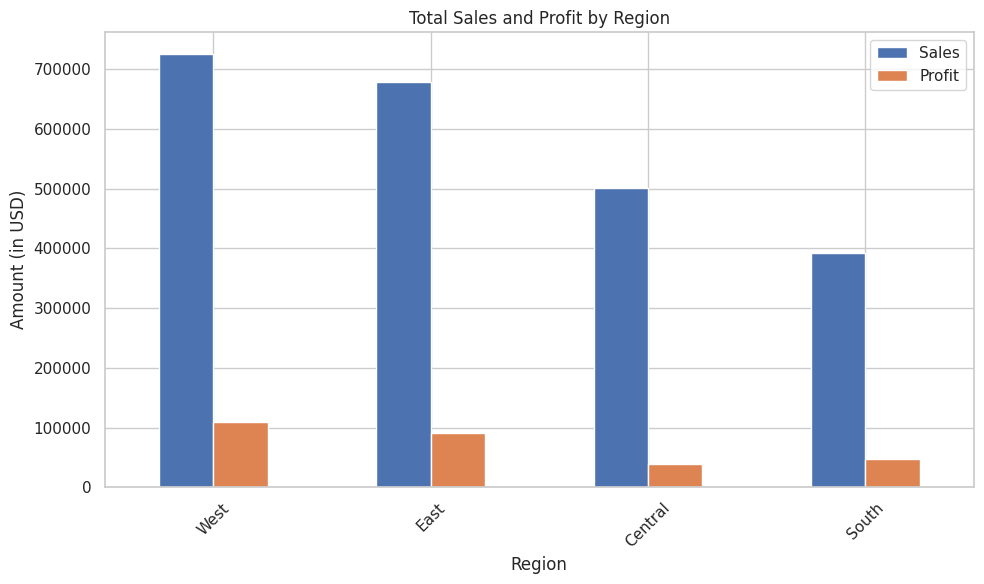

<Figure size 1000x600 with 0 Axes>

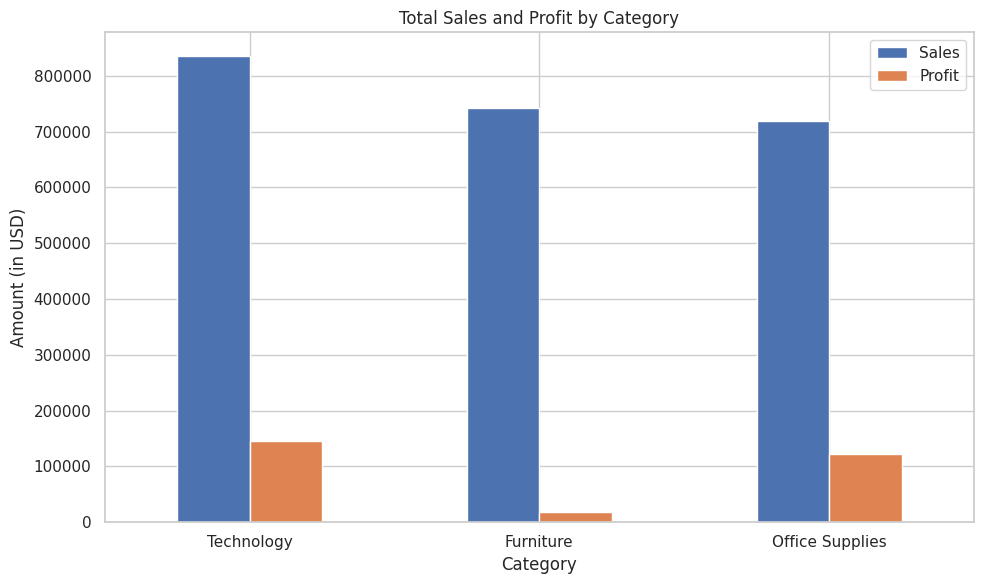

<Figure size 1000x600 with 0 Axes>

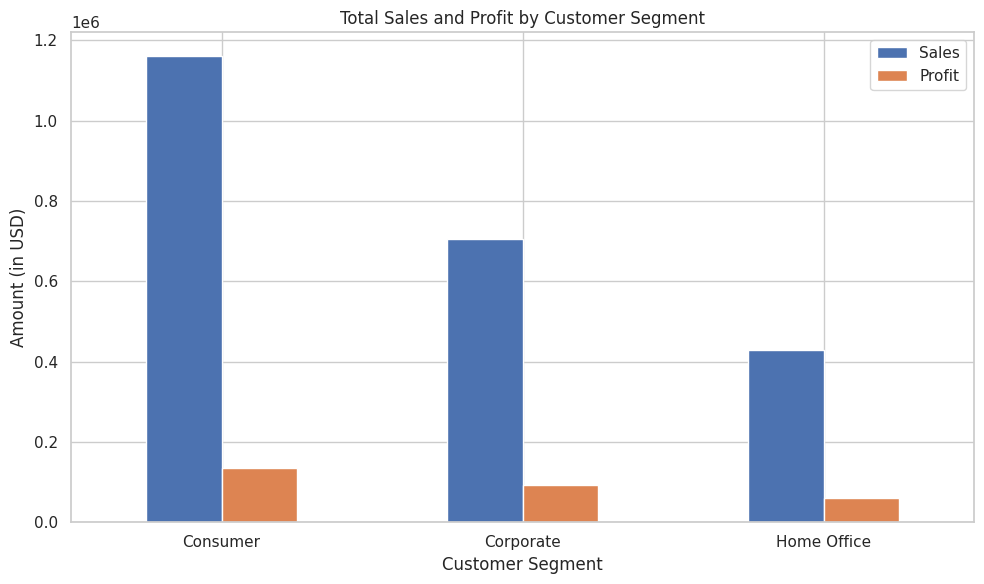

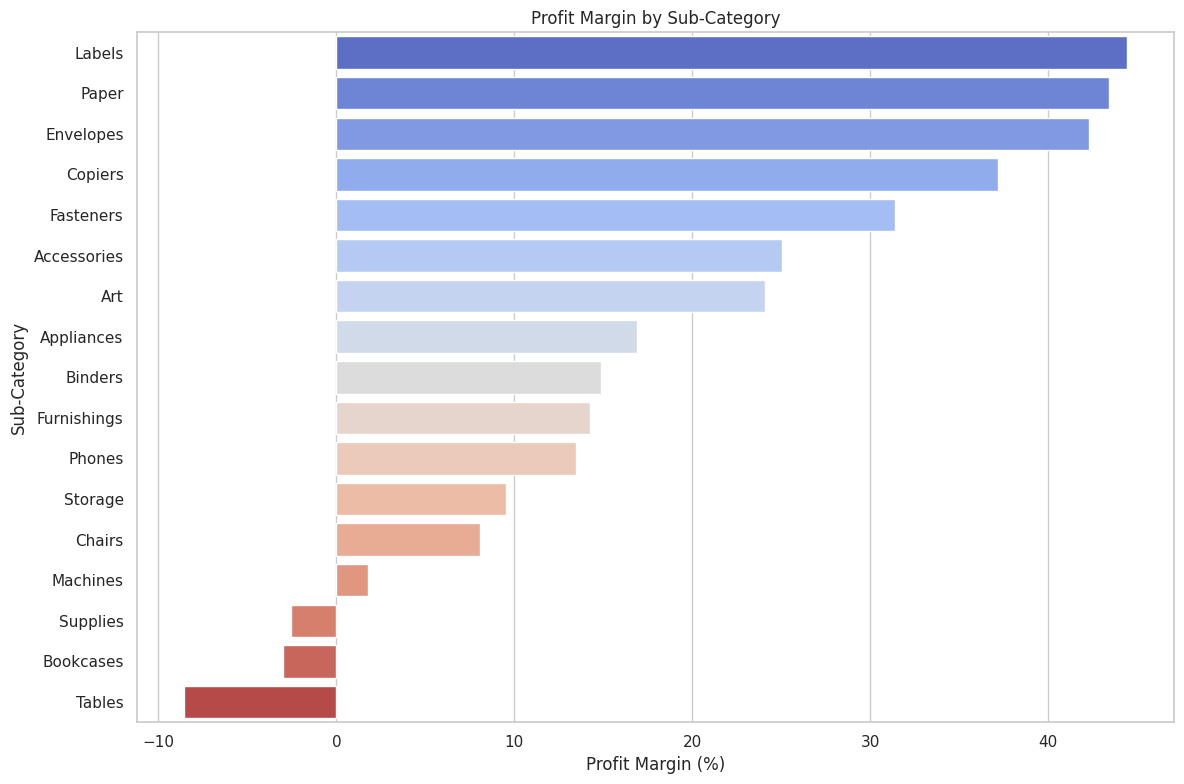

In [16]:
#Set plot style
sns.set(style="whitegrid")

# 1. Sales and Profit by Region
plt.figure(figsize=(10, 6))
region_analysis.sort_values('Sales', ascending=False).plot(x='Region', y=['Sales', 'Profit'], kind='bar', figsize=(10, 6))
plt.title('Total Sales and Profit by Region')
plt.ylabel('Amount (in USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_profit_by_region.png')

# 2. Sales and Profit by Category
plt.figure(figsize=(10, 6))
category_analysis.sort_values('Sales', ascending=False).plot(x='Category', y=['Sales', 'Profit'], kind='bar', figsize=(10, 6))
plt.title('Total Sales and Profit by Category')
plt.ylabel('Amount (in USD)')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sales_profit_by_category.png')

# 3. Sales and Profit by Segment
plt.figure(figsize=(10, 6))
segment_analysis.sort_values('Sales', ascending=False).plot(x='Segment', y=['Sales', 'Profit'], kind='bar', figsize=(10, 6))
plt.title('Total Sales and Profit by Customer Segment')
plt.ylabel('Amount (in USD)')
plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('sales_profit_by_segment.png')

# 4. Profit Margin by Sub-Category
sub_category_profit_margin = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sub_category_profit_margin['Profit Margin'] = (sub_category_profit_margin['Profit'] / sub_category_profit_margin['Sales']) * 100
sub_category_profit_margin = sub_category_profit_margin.sort_values('Profit Margin', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=sub_category_profit_margin, x='Profit Margin', y='Sub-Category', palette='coolwarm')
plt.title('Profit Margin by Sub-Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.savefig('profit_margin_by_subcategory.png')


In [17]:
print("Executive Summary Key Metrics:")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {profit_margin:.2f}%")

print("\nSales and Profit by Region:")
print(region_analysis.to_string(index=False))

print("\nSales and Profit by Category:")
print(category_analysis.to_string(index=False))

print("\nSales and Profit by Segment:")
print(segment_analysis.to_string(index=False))

print("\nTop 5 Most Profitable Sub-Categories (by Profit Margin):")
print(sub_category_profit_margin.head().to_string(index=False))

print("\nBottom 5 Least Profitable Sub-Categories (by Profit Margin):")
print(sub_category_profit_margin.tail().to_string(index=False))

Executive Summary Key Metrics:
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%

Sales and Profit by Region:
 Region       Sales      Profit
Central 501239.8908  39706.3625
   East 678781.2400  91522.7800
  South 391721.9050  46749.4303
   West 725457.8245 108418.4489

Sales and Profit by Category:
       Category       Sales      Profit
      Furniture 741999.7953  18451.2728
Office Supplies 719047.0320 122490.8008
     Technology 836154.0330 145454.9481

Sales and Profit by Segment:
    Segment        Sales      Profit
   Consumer 1161401.3450 134119.2092
  Corporate  706146.3668  91979.1340
Home Office  429653.1485  60298.6785

Top 5 Most Profitable Sub-Categories (by Profit Margin):
Sub-Category      Sales     Profit  Profit Margin
      Labels  12486.312  5546.2540      44.418672
       Paper  78479.206 34053.5693      43.391837
   Envelopes  16476.402  6964.1767      42.267582
     Copiers 149528.030 55617.8249      37.195585
   Fasteners   3024.

In [18]:
df.to_csv("cleaned_sales.csv")